In [1]:
import pandas as pd

df = pd.read_csv('../dados/sbank_usuarios.csv') 

df.head() # checando as 5 primeira linhas

,usuario_id,idade,renda_mensal,estado,data_cadastro,score_credito,tem_cartao,tem_conta_corrente
0,1,30,4840.38,RN,2024-04-13,701,False,True
1,2,59,12910.94,PR,2024-06-08,340,True,True
2,3,41,8104.98,SC,2024-04-23,647,True,True
3,4,36,2581.82,RJ,2024-02-02,716,False,True
4,5,26,20530.99,AM,2024-10-13,711,False,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   usuario_id          50000 non-null  int64  
 1   idade               50000 non-null  int64  
 2   renda_mensal        50000 non-null  float64
 3   estado              50000 non-null  object 
 4   data_cadastro       50000 non-null  object 
 5   score_credito       50000 non-null  int64  
 6   tem_cartao          50000 non-null  bool   
 7   tem_conta_corrente  50000 non-null  bool   
dtypes: bool(2), float64(1), int64(3), object(2)
memory usage: 2.4+ MB


In [3]:
df.describe()

,usuario_id,idade,renda_mensal,score_credito
count,50000.000000,50000.000000,50000.000000,50000.00000
mean,25000.500000,35.617400,6780.610609,649.85364
std,14433.901067,11.036937,6149.727364,118.89014
min,1.000000,18.000000,1000.000000,300.00000
25%,12500.750000,28.000000,2883.425000,569.00000
50%,25000.500000,33.000000,4946.675000,651.00000
75%,37500.250000,42.000000,8469.625000,731.00000
max,50000.000000,64.000000,50000.000000,950.00000


In [4]:
df['tem_cartao'].value_counts(normalize=True)

tem_cartao
True     0.74972
False    0.25028
Name: proportion, dtype: float64

In [5]:
df_processado = df.copy()

df_processado = df_processado.drop(columns=['usuario_id', 'data_cadastro'])

df_processado = pd.get_dummies(df_processado, columns=['estado'], drop_first=True)

df_processado.head()

,idade,renda_mensal,score_credito,tem_cartao,tem_conta_corrente,estado_AL,estado_AM,estado_AP,estado_BA,estado_CE,...,estado_PR,estado_RJ,estado_RN,estado_RO,estado_RR,estado_RS,estado_SC,estado_SE,estado_SP,estado_TO
0,30,4840.38,701,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,59,12910.94,340,True,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,41,8104.98,647,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,36,2581.82,716,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,26,20530.99,711,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
y = df_processado['tem_cartao']

X = df_processado.drop(columns=['tem_cartao'])

print("Formato de X (pistas):", X.shape)
print("Formato de y (respostas):", y.shape)


Formato de X (pistas): (50000, 30)
Formato de y (respostas): (50000,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 20%
    random_state=42 # qualquer numero serve aqui
)

print("Formato das pistas de treino (X_train):", X_train.shape)
print("Formato das pistas de teste (X_test):", X_test.shape)
print("Formato das respostas de treino (y_train):", y_train.shape)
print("Formato das respostas de teste (y_test):", y_test.shape)

Formato das pistas de treino (X_train): (40000, 30)
Formato das pistas de teste (X_test): (10000, 30)
Formato das respostas de treino (y_train): (40000,)
Formato das respostas de teste (y_test): (10000,)


Treinamento e Avaliação dos Modelos

## Modelo 1: Regressão Logística (Baseline)

In [8]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000) # tentativas

modelo.fit(X_train, y_train) # aprendizagem

c:\Users\Usuario\Desktop\ML-Analise-Credito\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Acurácia do modelo: 74.64%
--------------------------------------------------
Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      2536
        True       0.75      1.00      0.85      7464

    accuracy                           0.75     10000
   macro avg       0.37      0.50      0.43     10000
weighted avg       0.56      0.75      0.64     10000

--------------------------------------------------
Matriz de Confusão:


c:\Users\Usuario\Desktop\ML-Analise-Credito\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Usuario\Desktop\ML-Analise-Credito\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Usuario\Desktop\ML-Analise-Credito\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

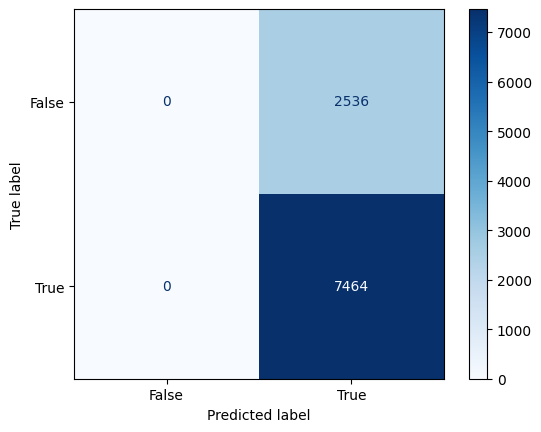

In [10]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

previsoes = modelo.predict(X_test)

acuracia = accuracy_score(y_test, previsoes)
print(f"Acurácia do modelo: {acuracia:.2%}")
print("-" * 50)

print("Relatório de Classificação:")
print(classification_report(y_test, previsoes))
print("-" * 50)

print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, cmap='Blues') # Oranges, Reds, Greys, Purples, Greens
plt.show()

## Modelo 2: Random Forest Padrão

Iniciando o treinamento do Random Forest...
Treinamento concluído!
Acurácia do Random Forest: 71.78%
--------------------------------------------------
Relatório de Classificação do Random Forest:
              precision    recall  f1-score   support

       False       0.26      0.06      0.10      2536
        True       0.75      0.94      0.83      7464

    accuracy                           0.72     10000
   macro avg       0.50      0.50      0.46     10000
weighted avg       0.62      0.72      0.65     10000

--------------------------------------------------
Matriz de Confusão do Random Forest:


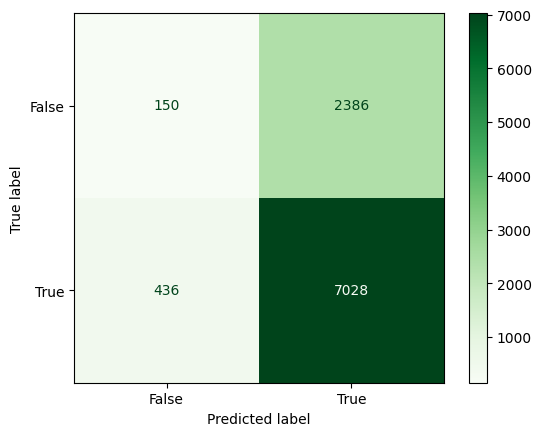

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

print("Iniciando o treinamento do Random Forest...")
modelo_rf.fit(X_train, y_train)
print("Treinamento concluído!")
print("=" * 50)

previsoes_rf = modelo_rf.predict(X_test)

acuracia_rf = accuracy_score(y_test, previsoes_rf)
print(f"Acurácia do Random Forest: {acuracia_rf:.2%}")
print("-" * 50)

print("Relatório de Classificação do Random Forest:")
print(classification_report(y_test, previsoes_rf))
print("-" * 50)

print("Matriz de Confusão do Random Forest:")
ConfusionMatrixDisplay.from_estimator(modelo_rf, X_test, y_test, cmap='Greens')
plt.show()

### Modelo 3: Random Forest com `class_weight='balanced'`

Iniciando o treinamento do Modelo Final (Random Forest 'Balanceado')
Treinamento concluído!
Acurácia do Modelo Final: 72.18%
--------------------------------------------------
Relatório de Classificação do Modelo Final:
              precision    recall  f1-score   support

       False       0.25      0.05      0.08      2536
        True       0.75      0.95      0.84      7464

    accuracy                           0.72     10000
   macro avg       0.50      0.50      0.46     10000
weighted avg       0.62      0.72      0.64     10000

--------------------------------------------------
Matriz de Confusão do Modelo Final:


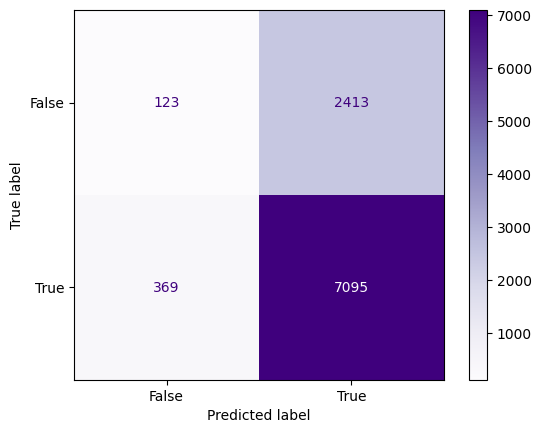

In [15]:
# --- Versão Final do Modelo: Random Forest com Class Weight ---

print("Iniciando o treinamento do Modelo Final (Random Forest 'Balanceado')")
# Adicionado: class_weight='balanced'
modelo_final_rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

modelo_final_rf.fit(X_train, y_train)
print("Treinamento concluído!")
print("=" * 50)

previsoes_final_rf = modelo_final_rf.predict(X_test)

print(f"Acurácia do Modelo Final: {accuracy_score(y_test, previsoes_final_rf):.2%}")
print("-" * 50)

print("Relatório de Classificação do Modelo Final:")
print(classification_report(y_test, previsoes_final_rf))
print("-" * 50)

print("Matriz de Confusão do Modelo Final:")
ConfusionMatrixDisplay.from_estimator(modelo_final_rf, X_test, y_test, cmap='Purples')
plt.show()

In [17]:
import joblib

nome_arquivo_modelo = '../src/modelo_sbank_rf.pkl'

joblib.dump(modelo_rf, nome_arquivo_modelo)

print(f"Modelo salvo com sucesso no arquivo: {nome_arquivo_modelo}")

Modelo salvo com sucesso no arquivo: ../src/modelo_sbank_rf.pkl
